#**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import plotly.express as px
import re


#**LOADING DATASET**

In [ ]:
data=pd.read_csv('/content/List.csv')

In [ ]:
data.head(1)

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,China,"765,367,947","1,409,517,397",1,54.30%,116


#**CLEANING DATA**

## **COLUMN OPERATIONS**

**RENAME COLUMNS**

In [ ]:
data = data.rename(columns={'Country or Area': 'Country',
                                    'Rank': 'Population rank',
                                    'Rank.1': 'Internet users rank'})
data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,"765,367,947","1,409,517,397",1,54.30%,116
1,India,"461,347,554","1,339,180,127",2,34.45%,145
2,United States,"244,090,854","324,459,463",3,75.23%,68
3,Brazil,"141,206,801","209,288,278",4,67.47%,83
4,Japan,"115,845,120","127,484,450",5,90.87%,23
...,...,...,...,...,...,...
210,Falkland Islands,"2,881","2,910",211,99.02% (2016),-
211,Montserrat,"2,833","5,177",212,54.55% (2013),115
212,Wallis and Futuna,"1,383","11,773",213,8.95% (2012),-
213,Niue,"1,034","1,618",214,86.90% (2013),30


## **CONVERTING DATATYPES**

In [ ]:
# print the data types of each column
print(data.dtypes)

Country                object
Internet Users         object
Population             object
Population rank         int64
Percentage             object
Internet users rank    object
dtype: object


**CHECK FOR SPECIAL KEYS**

In [ ]:
# Define the special characters pattern
special_characters = r'[!@#$%^&*()_+{}\[\]:;<>,.?~\\|"]'

def highlight_special_characters(val):
    if isinstance(val, str) and re.search(special_characters, val):
        return 'background-color: blue'
    return ''

styled_data = data.style.applymap(highlight_special_characters)
styled_data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,"765,367,947","1,409,517,397",1,54.30%,116
1,India,"461,347,554","1,339,180,127",2,34.45%,145
2,United States,"244,090,854","324,459,463",3,75.23%,68
3,Brazil,"141,206,801","209,288,278",4,67.47%,83
4,Japan,"115,845,120","127,484,450",5,90.87%,23
5,Russia,"109,446,612","143,989,754",6,76.01%,64
6,Indonesia,"85,242,816","263,991,379",7,32.29%,150
7,Mexico,"82,470,752","129,163,276",8,63.85%,92
8,Germany,"69,304,405","82,114,224",9,84.40%,36
9,Philippines,"63,003,313","104,918,090",10,60.05%,103


Observations:



1.   Country-special keys
2. Internet Users- remove " '"
3.  Population-remove " '"
4.   percentage-symbols,inclded year,float
5. Internet users rank-"-"



**1.REPLACE SPECIAL KEYS**

In [ ]:
#selecting the symbol column which i want
#country
data[data['Country'].str.contains(r'[^A-Za-z0-9]')]

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
2,United States,"244,090,854","324,459,463",3,75.23%,68
10,United Kingdom,"62,621,016","66,181,585",11,94.62%,18
15,South Korea,"48,484,084","50,982,212",16,95.10%,15
23,South Africa,"31,858,027","56,717,156",24,56.17%,111
28,Saudi Arabia,"27,048,861","32,938,213",29,82.12%,39
47,Ivory Coast,"10,650,818","24,294,750",48,43.84%,133
53,United Arab Emirates,"8,913,217","9,400,145",54,94.82%,17
55,Czech Republic,"8,358,728","10,618,303",56,78.72%,56
63,Sri Lanka,"7,121,116","20,876,917",64,34.11%,147
65,Democratic Republic of the Congo,"7,011,507","81,339,988",66,8.62%,200


In [ ]:
#internet users
data['Internet Users'] = data['Internet Users'].str.replace(',', '').astype(int)
data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,"1,409,517,397",1,54.30%,116
1,India,461347554,"1,339,180,127",2,34.45%,145
2,United States,244090854,"324,459,463",3,75.23%,68
3,Brazil,141206801,"209,288,278",4,67.47%,83
4,Japan,115845120,"127,484,450",5,90.87%,23
...,...,...,...,...,...,...
210,Falkland Islands,2881,"2,910",211,99.02% (2016),-
211,Montserrat,2833,"5,177",212,54.55% (2013),115
212,Wallis and Futuna,1383,"11,773",213,8.95% (2012),-
213,Niue,1034,"1,618",214,86.90% (2013),30


In [ ]:
#population
data['Population'] = data['Population'].str.replace(',', '').astype(int)
data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,1409517397,1,54.30%,116
1,India,461347554,1339180127,2,34.45%,145
2,United States,244090854,324459463,3,75.23%,68
3,Brazil,141206801,209288278,4,67.47%,83
4,Japan,115845120,127484450,5,90.87%,23
...,...,...,...,...,...,...
210,Falkland Islands,2881,2910,211,99.02% (2016),-
211,Montserrat,2833,5177,212,54.55% (2013),115
212,Wallis and Futuna,1383,11773,213,8.95% (2012),-
213,Niue,1034,1618,214,86.90% (2013),30


In [ ]:
#percentage
# split the 'Percentage' column by space and extract the first part (i.e., percentage value)
data['Percentage'] = data['Percentage'].str.split().str[0]

# remove the '%' symbol from the 'Percentage' column and convert to float
data['Percentage'] = data['Percentage'].str.replace('%', '').astype(float)


In [ ]:
data.dtypes

Country                 object
Internet Users           int64
Population               int64
Population rank          int64
Percentage             float64
Internet users rank     object
dtype: object

In [ ]:
data['Percentage'] = data['Percentage'].astype(int)

In [ ]:
data.dtypes

Country                object
Internet Users          int64
Population              int64
Population rank         int64
Percentage              int64
Internet users rank    object
dtype: object

In [ ]:
data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,1409517397,1,54,116
1,India,461347554,1339180127,2,34,145
2,United States,244090854,324459463,3,75,68
3,Brazil,141206801,209288278,4,67,83
4,Japan,115845120,127484450,5,90,23
...,...,...,...,...,...,...
210,Falkland Islands,2881,2910,211,99,-
211,Montserrat,2833,5177,212,54,115
212,Wallis and Futuna,1383,11773,213,8,-
213,Niue,1034,1618,214,86,30


In [ ]:
# Replace hyphens with NaN values
data['Internet users rank'] = data['Internet users rank'].replace('-', pd.NA)

# Convert the column to numeric type
data['Internet users rank'] = pd.to_numeric(data['Internet users rank'], errors='coerce')

# Convert the column to integer type
data['Internet users rank'] = data['Internet users rank'].astype('Int64')

# Print the data types of the columns
print(data.dtypes)

Country                object
Internet Users          int64
Population              int64
Population rank         int64
Percentage              int64
Internet users rank     Int64
dtype: object


In [ ]:
data

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,1409517397,1,54,116
1,India,461347554,1339180127,2,34,145
2,United States,244090854,324459463,3,75,68
3,Brazil,141206801,209288278,4,67,83
4,Japan,115845120,127484450,5,90,23
...,...,...,...,...,...,...
210,Falkland Islands,2881,2910,211,99,<NA>
211,Montserrat,2833,5177,212,54,115
212,Wallis and Futuna,1383,11773,213,8,<NA>
213,Niue,1034,1618,214,86,30


In [ ]:
#recheck all special characters
import re
def highlight_special_characters(val):
  if isinstance(val, str) and re.search(r'[^A-Za-z0-9]', val):
    return 'background-color: blue'
  return ''

data.style.applymap(highlight_special_characters)

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,1409517397,1,54,116
1,India,461347554,1339180127,2,34,145
2,United States,244090854,324459463,3,75,68
3,Brazil,141206801,209288278,4,67,83
4,Japan,115845120,127484450,5,90,23
5,Russia,109446612,143989754,6,76,64
6,Indonesia,85242816,263991379,7,32,150
7,Mexico,82470752,129163276,8,63,92
8,Germany,69304405,82114224,9,84,36
9,Philippines,63003313,104918090,10,60,103


##**HANDLING DUPLICATES**

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [ ]:
new1=data.drop_duplicates()
print(new1)

               Country  Internet Users  Population  Population rank  \
0                China       765367947  1409517397                1   
1                India       461347554  1339180127                2   
2        United States       244090854   324459463                3   
3               Brazil       141206801   209288278                4   
4                Japan       115845120   127484450                5   
..                 ...             ...         ...              ...   
210   Falkland Islands            2881        2910              211   
211         Montserrat            2833        5177              212   
212  Wallis and Futuna            1383       11773              213   
213               Niue            1034        1618              214   
214          Ascension             361         806              215   

     Percentage  Internet users rank  
0            54                  116  
1            34                  145  
2            75               

## **HANDLING MISSING DATA**

**CHECKING MISSING DATA**

In [ ]:
new1.isnull().sum().sort_values(ascending=False)

Internet users rank    6
Country                0
Internet Users         0
Population             0
Population rank        0
Percentage             0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

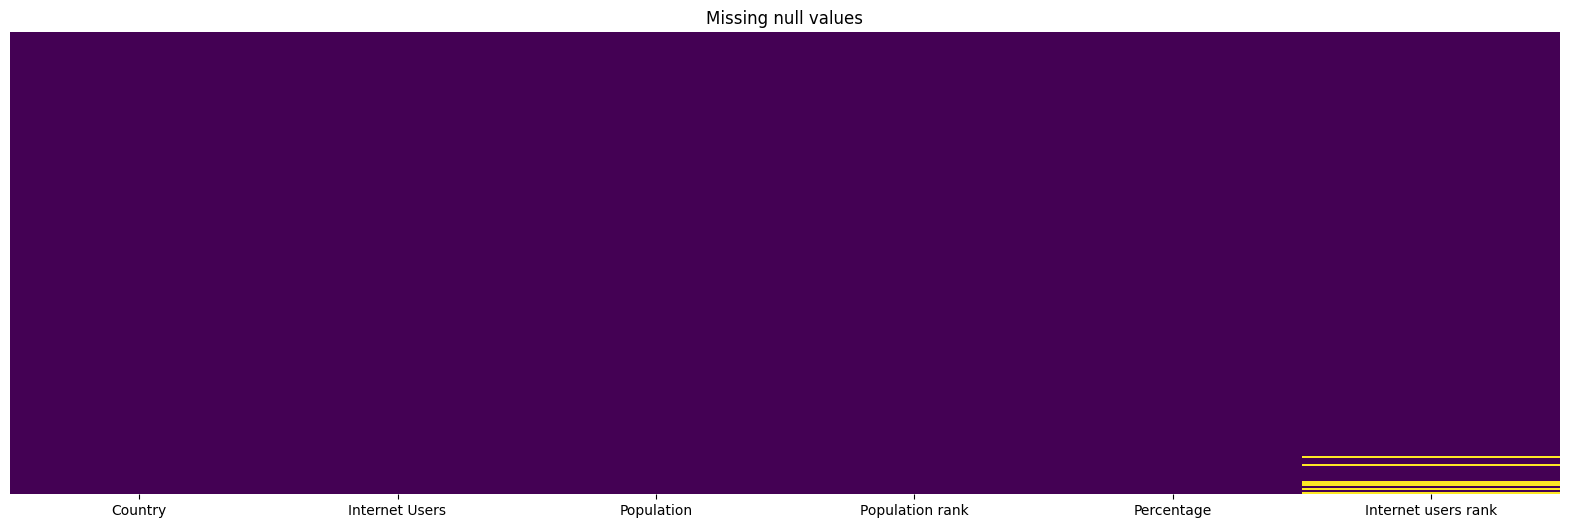

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(data.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

Text(0.5, 1.0, 'Quantifying missing data')

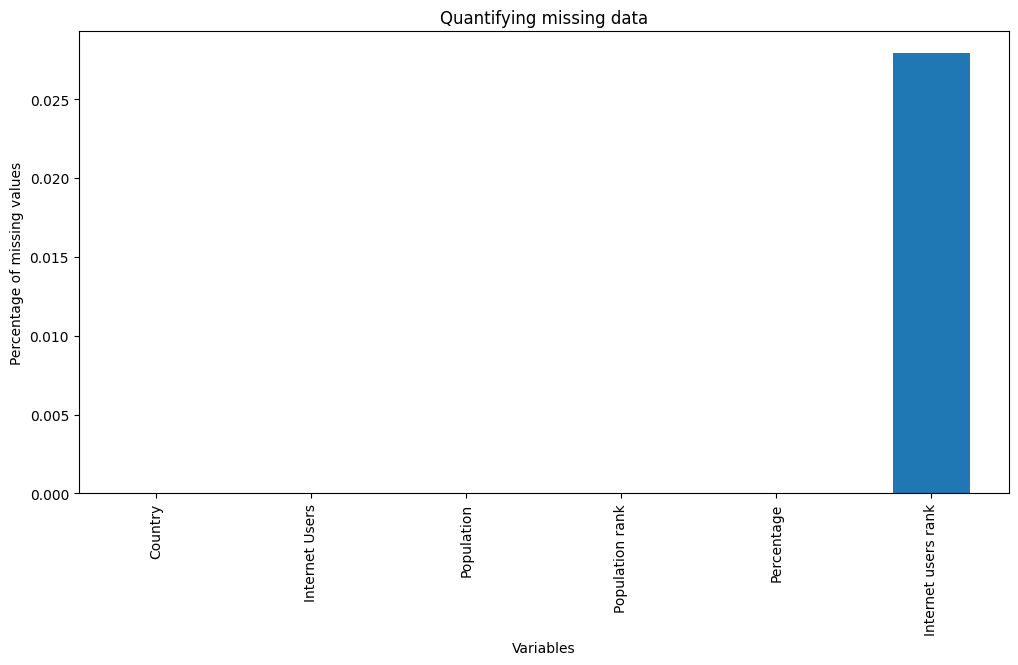

In [ ]:
new1.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

**CHECKING NULL VALUES**

In [ ]:
new1.isnull().sum().sort_values(ascending=False)

Internet users rank    6
Country                0
Internet Users         0
Population             0
Population rank        0
Percentage             0
dtype: int64

In [ ]:
new1.isna().any()

Country                False
Internet Users         False
Population             False
Population rank        False
Percentage             False
Internet users rank     True
dtype: bool

In [ ]:
new1.isna().sum()

Country                0
Internet Users         0
Population             0
Population rank        0
Percentage             0
Internet users rank    6
dtype: int64

**METHOD 4- MISSING VALUE TRANSFORMATION**


**NUMERICAL-MEDIAN**

In [ ]:
#in the Internet users rank column

# Calculate the median of the 'Internet users rank' column
median = new1['Internet users rank'].median()

# Fill the missing values in the 'column_name' column with the median value
new1.loc[:, 'Internet users rank'].fillna(median, inplace=True)

In [ ]:
new1

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
0,China,765367947,1409517397,1,54,116
1,India,461347554,1339180127,2,34,145
2,United States,244090854,324459463,3,75,68
3,Brazil,141206801,209288278,4,67,83
4,Japan,115845120,127484450,5,90,23
...,...,...,...,...,...,...
210,Falkland Islands,2881,2910,211,99,105
211,Montserrat,2833,5177,212,54,115
212,Wallis and Futuna,1383,11773,213,8,105
213,Niue,1034,1618,214,86,30


In [ ]:
new1.isnull().sum().sort_values(ascending=False)

Country                0
Internet Users         0
Population             0
Population rank        0
Percentage             0
Internet users rank    0
dtype: int64

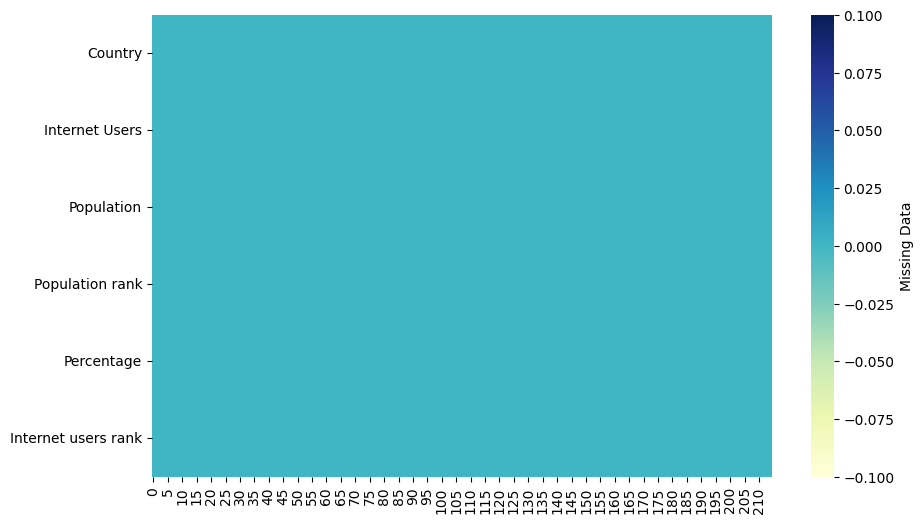

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(new1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

#FINAL CHECKS

In [ ]:
new1.dtypes

Country                object
Internet Users          int64
Population              int64
Population rank         int64
Percentage              int64
Internet users rank     Int64
dtype: object

# COPY OF CLEANED DATASET

In [33]:
new1.to_csv('cleaned_list.csv',index=False)